# Churn Modeling Report

Business Objective: The business objective of this dataset is to analyze and understand the factors that influence customer churn in the bank. The dataset contains details of the bank's customers, and the target variable is a binary indicator representing whether the customer closed their account (churned) or continues to be a customer.

By exploring this dataset, the bank aims to gain insights into the characteristics and behaviors of customers who are more likely to churn. The analysis will help the bank identify potential areas of improvement in their products, services, and customer experience to reduce churn and retain more customers. The ultimate goal is to develop strategies and actions that will enhance customer loyalty and maximize customer retention, leading to better business performance and profitability.

# TABLE OF CONTENT

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [163]:
df = pd.read_csv('/content/Churn_Modelling.csv')

# 1. Explore data

In [164]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9572,9573,15641688,Collier,644,Spain,Male,18,7,0.00,1,0,1,59645.24,1
8913,8914,15717307,Read,496,France,Male,31,5,0.00,2,1,0,93713.13,0
5376,5377,15602500,Maslova,850,Spain,Male,38,1,146343.98,1,0,1,103902.11,0
1390,1391,15727281,Macintyre,653,France,Female,27,9,0.00,2,1,0,96429.29,0
4320,4321,15611544,Ibeamaka,701,Germany,Male,36,7,95448.32,2,1,0,189085.07,0


In [165]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


- df: 10000
- Creadit Score: 350-850
- Age: average age 38.9, youngest person 18 years old, oldest person 92 years old, 75% of people in the data are people under 44 years old
- Tenure: Number of years a person becomes a bank customer
- Balance: the balance in the account
- NumOfProducts: Number of products that customers have purchased through the bank
- HasCrCard: With or without credit card
- IsActiveMember: Is it active or not?
- EstimatedSalary: estimated income of the customer
- Exited: Has the customer left the service or not?

In [166]:
df.drop(columns=['CustomerId', 'Surname', 'RowNumber'], inplace=True)

In [167]:
columns = df.columns
for col in columns:
    print(col, ':' ,len(df[col].value_counts()))

CreditScore : 460
Geography : 3
Gender : 2
Age : 70
Tenure : 11
Balance : 6382
NumOfProducts : 4
HasCrCard : 2
IsActiveMember : 2
EstimatedSalary : 9999
Exited : 2


# 2. Explore variables

## Age

In [168]:
age_df = df.groupby(by=['Age', 'Exited']).agg('count')
age_df.reset_index(drop=False, inplace=True)
age_df_inexit = age_df[age_df['Exited']==0][['Age', 'CreditScore']]
age_df_inexit = age_df_inexit.rename(columns={"CreditScore":"Count_inexit"})

age_df_exit = age_df[age_df['Exited'] == 1][['Age', 'CreditScore']]
age_df_exit = age_df_exit.rename(columns={"CreditScore":"Count_exit"})

age_vs_exited = pd.merge(age_df_inexit, age_df_exit, how = "outer", left_on="Age", right_on="Age")
age_vs_exited['ratio'] = age_vs_exited.fillna(0, inplace=True)

# Calculate the ratio and store it in the 'ratio' column
age_vs_exited['ratio'] = age_vs_exited['Count_exit']*100/(age_vs_exited['Count_inexit']+age_vs_exited['Count_exit'])
age_vs_exited

,Age,Count_inexit,Count_exit,ratio
0,18,20,2.0,9.090909
1,19,26,1.0,3.703704
2,20,38,2.0,5.000000
3,21,50,3.0,5.660377
4,22,72,12.0,14.285714
...,...,...,...,...
65,83,1,0.0,0.000000
66,84,1,1.0,50.000000
67,85,1,0.0,0.000000
68,88,1,0.0,0.000000


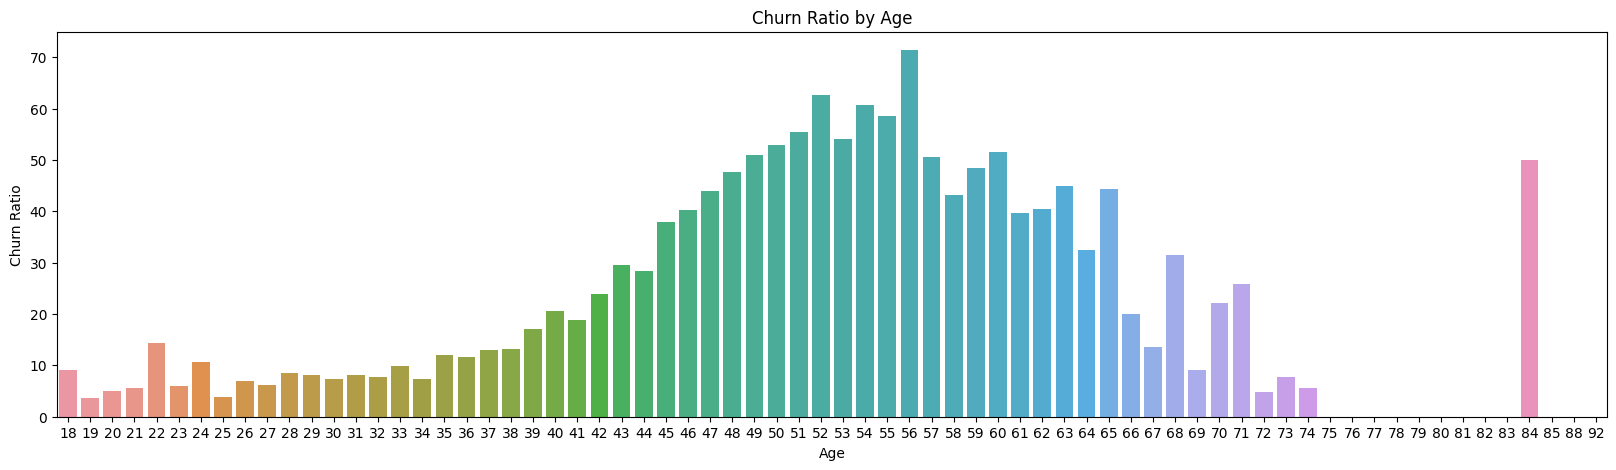

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming age_vs_exited DataFrame is correctly defined and contains 'Age' and 'ratio' columns

fig, ax = plt.subplots(figsize=[20, 5])

# Create a bar plot using Seaborn
sns.barplot(data=age_vs_exited, x='Age', y='ratio')

# Add labels and title (customize as needed)
ax.set_xlabel('Age')
ax.set_ylabel('Churn Ratio')
ax.set_title('Churn Ratio by Age')

plt.show()

- The highest churn rate is observed at the age of 55, with the age range of 45-65 experiencing the highest churn rates.
- At the age of 84, there is a sudden surge in the churn rate.

In [170]:
def ratio(nation):
    return len(df[(df['Geography']==str(nation))&(df['Age']>=45)&(df['Age']<=65)])/len(df[df['Geography']==str(nation)])

In [171]:
for i in ['Germany', 'France', 'Spain']:
    print(i, ":", "{:.2f}".format(ratio(i)))

Germany : 0.25
France : 0.19
Spain : 0.20


Germany is the country with the highest churn rate among the other two countries.

## Tenure

In [172]:
df_ten_exit = df[df.Exited == 1].groupby("Tenure").agg('count')
df_ten_exit.reset_index(drop=False, inplace=True)
df_ten_exit = df_ten_exit[['Tenure', 'CreditScore']]
df_ten_exit = df_ten_exit.rename(columns={"CreditScore":"Count"})

df_ten_inexit = df[df.Exited == 0].groupby("Tenure").agg('count')
df_ten_inexit.reset_index(drop=False, inplace=True)
df_ten_inexit = df_ten_inexit[['Tenure', 'CreditScore']]
df_ten_inexit = df_ten_inexit.rename(columns={'CreditScore':'Count'})

df_ten = pd.merge(df_ten_exit, df_ten_inexit, how='outer', on='Tenure', suffixes=('_exit', '_inexit'))
df_ten['ratio'] = df_ten['Count_exit'] / (df_ten['Count_exit'] + df_ten['Count_inexit'])
df_ten

,Tenure,Count_exit,Count_inexit,ratio
0,0,95,318,0.230024
1,1,232,803,0.224155
2,2,201,847,0.191794
3,3,213,796,0.211100
4,4,203,786,0.205258
5,5,209,803,0.206522
6,6,196,771,0.202689
7,7,177,851,0.172179
8,8,197,828,0.192195
9,9,213,771,0.216463


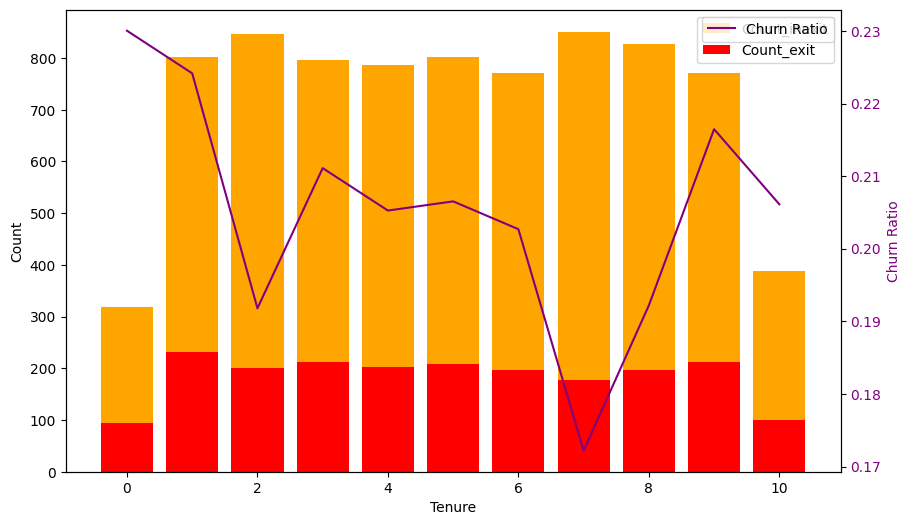

In [173]:
import matplotlib.pyplot as plt

# Assuming you already have df_ten DataFrame correctly created

fig, ax = plt.subplots(figsize=[10, 6])

ax.bar(x=df_ten.Tenure, height=df_ten['Count_inexit'], label='Count_inexit', color='Orange')
ax.bar(x=df_ten.Tenure, height=df_ten['Count_exit'], label='Count_exit', color='red')

ax.set_xlabel('Tenure')
ax.set_ylabel('Count')
ax.legend()

ax2 = ax.twinx()
ax2.plot(df_ten.Tenure, df_ten['ratio'], color='purple', label='Churn Ratio')
ax2.set_ylabel('Churn Ratio', color='purple')
ax2.tick_params(axis='y', labelcolor='purple')
ax2.legend(loc='upper right')

plt.show()

- In general, customers with tenure of 1-9 years are the majority, accounting for the highest count. The churn ratio (number of people who exited/total customers) for each tenure year remains relatively constant at around 20%.
- Note: At tenure = 7, the churn ratio significantly decreases.

## Estimated Salary

In [174]:
df_sal_excited_fe = df[df['Gender']=='Female'][['Exited', 'EstimatedSalary']]
df_sal_excited_ma = df[df['Gender']=='Male'][['Exited', 'EstimatedSalary']]

# Use square brackets to pass the 'Exited' column as a list to groupby
df_sal_excited_fe.groupby(by='Exited').agg("mean")

,EstimatedSalary
Exited,
0,99816.071486
1,102948.986093


The average salary of males and females in the data is quite similar.

## Geography

In [175]:
df_geo = df.groupby(by=['Geography']).agg('count')
df_geo.reset_index(inplace=True, drop=False)
df_geo = df_geo[['Geography', 'Age']]
df_geo.rename(inplace=True, columns={'Age':'count'})
df_geo

,Geography,count
0,France,5014
1,Germany,2509
2,Spain,2477


In [176]:
df_geo_exit = df[df['Exited'] == 1].groupby(by=['Geography']).agg('count')
df_geo_exit.reset_index(inplace=True, drop=False)
df_geo_exit = df_geo_exit[['Geography', 'Exited']]
df_geo_exit.rename(columns={'Exited': 'count'}, inplace=True)
df_geo_exit
df_geo['count_exit'] = df_geo_exit['count']
df_geo['exit_ratio'] = df_geo['count_exit']/df_geo['count']
df_geo

,Geography,count,count_exit,exit_ratio
0,France,5014,810,0.161548
1,Germany,2509,814,0.324432
2,Spain,2477,413,0.166734


In [177]:
df_f = df[df['Geography']=='France']
df_f.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,5014.000000,5014.000000,5014.000000,5014.000000,5014.000000,5014.000000,5014.000000,5014.000000,5014.000000
mean,649.668329,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814,0.161548
std,97.016799,10.469459,2.888475,64133.565524,0.570347,0.455356,0.499769,57336.289016,0.368072
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,90.070000,0.000000
25%,582.000000,31.000000,2.000000,0.000000,1.000000,0.000000,0.000000,51399.190000,0.000000
50%,653.000000,37.000000,5.000000,62153.500000,1.000000,1.000000,1.000000,99132.310000,0.000000
75%,717.000000,43.000000,7.000000,121444.877500,2.000000,1.000000,1.000000,149295.360000,0.000000
max,850.000000,92.000000,10.000000,238387.560000,4.000000,1.000000,1.000000,199929.170000,1.000000


In [178]:
df_g = df[df['Geography']=='Germany']
df_g.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,2509.000000,2509.000000,2509.000000,2509.000000,2509.000000,2509.00000,2509.000000,2509.000000,2509.000000
mean,651.453567,39.771622,5.009964,119730.116134,1.519729,0.71383,0.497409,101113.435102,0.324432
std,98.168937,10.519143,2.935154,27022.006157,0.619420,0.45206,0.500093,58263.011501,0.468256
min,350.000000,18.000000,0.000000,27288.430000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,2.000000,102800.720000,1.000000,0.00000,0.000000,51016.020000,0.000000
50%,651.000000,38.000000,5.000000,119703.100000,1.000000,1.00000,0.000000,102397.220000,0.000000
75%,722.000000,45.000000,8.000000,137560.380000,2.000000,1.00000,1.000000,151083.800000,1.000000
max,850.000000,84.000000,10.000000,214346.960000,4.000000,1.00000,1.000000,199970.740000,1.000000


In [179]:
df_s = df[df['Geography']=='Spain']
df_s.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,2477.000000,2477.000000,2477.000000,2477.000000,2477.000000,2477.000000,2477.000000,2477.000000,2477.000000
mean,651.333872,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281,0.166734
std,94.365051,10.446119,2.856660,64235.555208,0.564646,0.460588,0.499220,57103.678091,0.372813
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,417.410000,0.000000
25%,587.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50267.690000,0.000000
50%,651.000000,37.000000,5.000000,61710.440000,2.000000,1.000000,1.000000,99984.860000,0.000000
75%,715.000000,44.000000,8.000000,121056.630000,2.000000,1.000000,1.000000,147278.430000,0.000000
max,850.000000,88.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


- In the data, the number of people from France is twice as much as the number of people from Germany/Spain.
- Germany has the highest churn rate, while France and Spain have similar churn rates.
- People from Germany have a higher average account balance compared to the other two countries, but they also have a higher churn rate. Overall, the account balance does not seem to influence the decision to churn among customers.
- Is it true that the number of people from Germany in the data with a tenure of 7 accounts for a low percentage, resulting in a low churn rate for tenure = 7?

## Balance

<ipython-input-180-860e44fe52a8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Balance'])


<Axes: xlabel='Balance', ylabel='Density'>

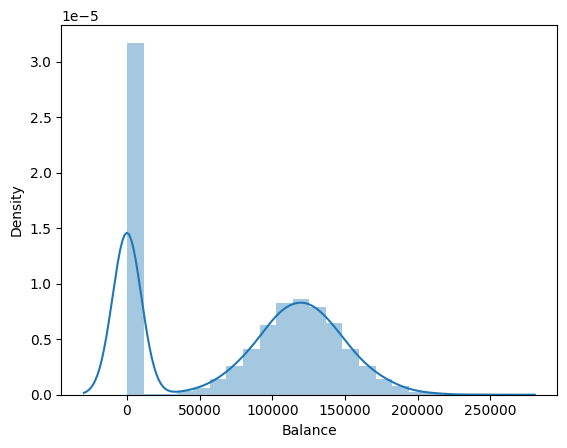

In [180]:
sns.distplot(df['Balance'])

- A considerable number of people maintain a zero account balance. Does this contribute to an increase in the churn rate?

In [181]:
df1 = df[df['Balance']==0]
len(df1[df1['Exited']==1])/len(df1)

0.13823610727121924

In [182]:
def group_bal(bal):
    if int(bal)==0:
        return 0
    if int(bal) in range(1, 50000):
        return 1
    if int(bal) in range(50000, 100000):
        return 50
    if int(bal) in range(100000, 150000):
        return 100
    if int(bal) in range(150000, 200000):
        return 150
    if int(bal) in range(200000, 250000):
        return 200
    elif int(bal) in range(200000, 250000):
        return 200
    else:
        return 250

In [183]:
df['group_bal'] = df['Balance'].map(group_bal)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,group_bal
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,50
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,150
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,100
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,50
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,50


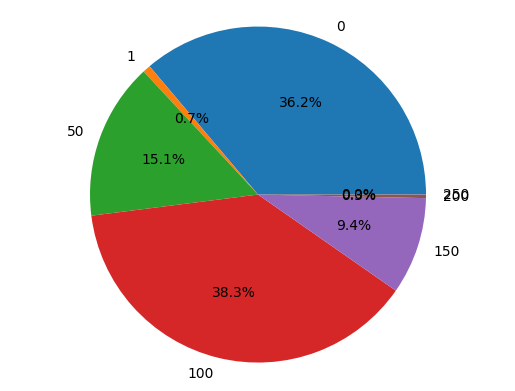

In [184]:
df_group_bal = df.groupby(by='group_bal').agg('count')
df_group_bal.reset_index(inplace=True, drop=False)

labels = df_group_bal['group_bal']

fig1, ax1 = plt.subplots()
ax1.pie(df_group_bal['Age'], labels=labels, autopct='%1.1f%%')

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [185]:
df_bal = df.groupby(by=['group_bal', 'Exited']).agg('count')
df_bal.reset_index(drop=False, inplace=True)
df_bal = df_bal.rename(columns={'Age':'count'})
df_bal = df_bal[['group_bal', 'Exited', 'count']]
df_balance_ = df_bal[df_bal['Exited']==0]
df_balance_ex = df_bal[df_bal['Exited']==1]

In [186]:
df_balance = pd.merge(df_balance_, df_balance_ex, how = 'outer', on='group_bal', suffixes=('_inex', '_ex'))
df_balance

,group_bal,Exited_inex,count_inex,Exited_ex,count_ex
0,0,0.0,3117.0,1,500
1,1,0.0,49.0,1,26
2,50,0.0,1209.0,1,300
3,100,0.0,2843.0,1,987
4,150,0.0,730.0,1,205
5,200,0.0,15.0,1,18
6,250,NaN,NaN,1,1


In [187]:
df_balance.drop(columns=['Exited_ex', 'Exited_inex'], inplace=True)
df_balance['ratio'] = df_balance['count_ex'] / (df_balance['count_ex'] + df_balance['count_inex'])
df_balance

,group_bal,count_inex,count_ex,ratio
0,0,3117.0,500,0.138236
1,1,49.0,26,0.346667
2,50,1209.0,300,0.198807
3,100,2843.0,987,0.257702
4,150,730.0,205,0.219251
5,200,15.0,18,0.545455
6,250,NaN,1,NaN


Maintaining a zero account balance does not necessarily imply a high churn rate.

## Has credit card

In [188]:
df_creditcard = df.groupby(by=['Exited', 'HasCrCard']).agg('count')
df_creditcard.reset_index(drop=False, inplace=True)
df_creditcard = df_creditcard[['Exited', 'HasCrCard', 'Age']]
df_creditcard.rename(columns={'Age': 'count'}, inplace=True)

# Specify the suffixes during merge
df_creditcard = pd.merge(df_creditcard[df_creditcard['Exited']==0], df_creditcard[df_creditcard['Exited']==1], on='HasCrCard', how='outer', suffixes=('_inex', '_ex'))
df_creditcard.drop(columns=['Exited_inex', 'Exited_ex'], inplace=True)
df_creditcard['ratio'] = df_creditcard['count_ex'] / (df_creditcard['count_ex'] + df_creditcard['count_inex'])
df_creditcard

,HasCrCard,count_inex,count_ex,ratio
0,0,2332,613,0.208149
1,1,5631,1424,0.201843


There is no impact on churn whether you have credit card or not.

## Credit Score

<ipython-input-189-29c59dec5a1f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CreditScore'])


<Axes: xlabel='CreditScore', ylabel='Density'>

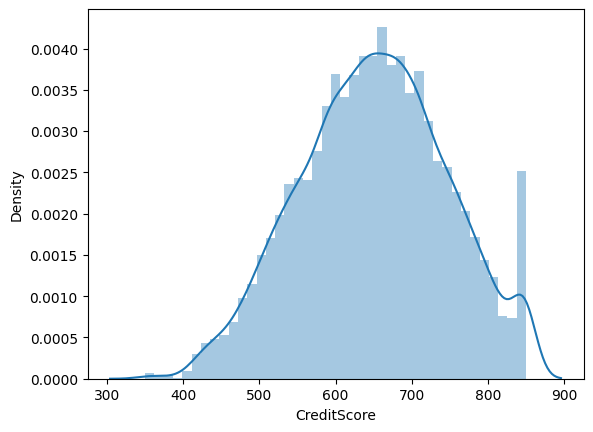

In [189]:
sns.distplot(df['CreditScore'])

<ipython-input-190-35dd6beaa48a>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Geography'] == i]['CreditScore'], ax=axes[index])
<ipython-input-190-35dd6beaa48a>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Geography'] == i]['CreditScore'], ax=axes[index])
<ipython-input-190

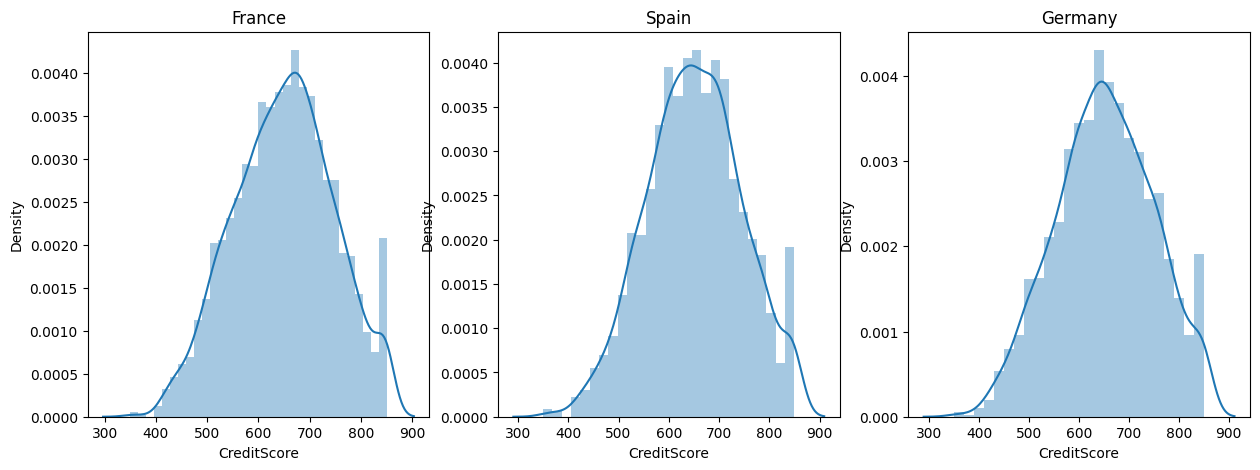

In [190]:
geo = ['France', 'Spain', 'Germany']
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for index, i in enumerate(geo):
    sns.distplot(df[df['Geography'] == i]['CreditScore'], ax=axes[index])
    axes[index].set_title(i)

plt.show()

## Is Active Member

<Axes: xlabel='IsActiveMember', ylabel='count'>

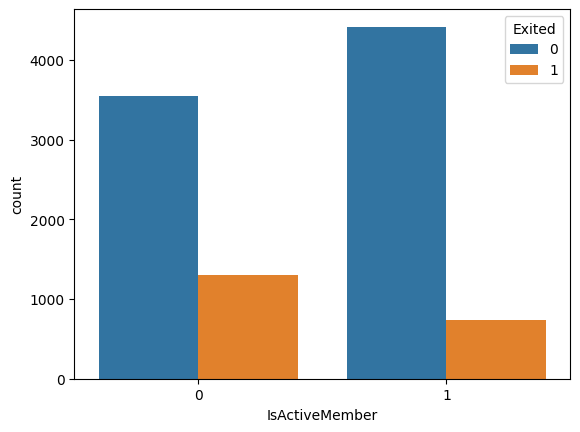

In [191]:
sns.countplot(data=df, x='IsActiveMember', hue='Exited')

<Axes: xlabel='IsActiveMember', ylabel='count'>

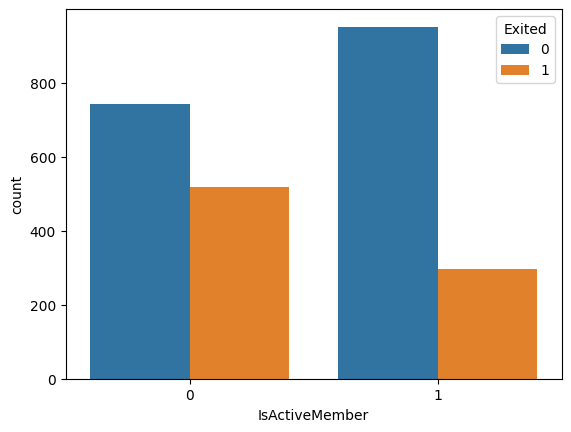

In [192]:
sns.countplot(data=df[df['Geography']=='Germany'], x='IsActiveMember', hue='Exited')

<Axes: xlabel='IsActiveMember', ylabel='count'>

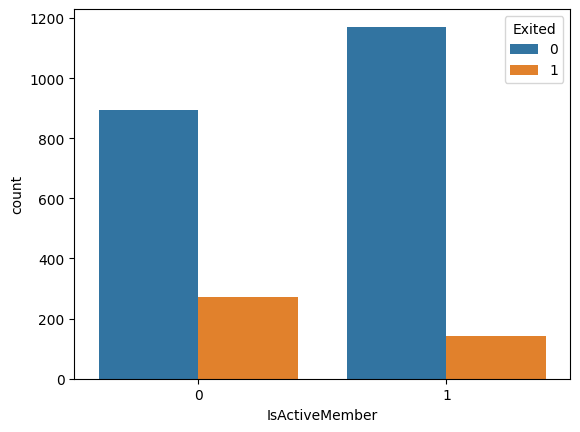

In [193]:
sns.countplot(data=df[df['Geography']=='Spain'], x='IsActiveMember', hue='Exited')

<Axes: xlabel='IsActiveMember', ylabel='count'>

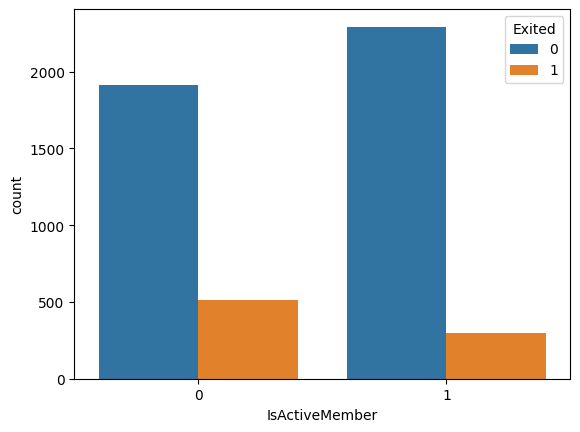

In [194]:
sns.countplot(data=df[df['Geography']=='France'], x='IsActiveMember', hue='Exited')

Among the churned customers, the proportion of active members is higher => Active members tend to have a lower churn rate

## Number of products

In [195]:
df_pro  = df.groupby(by=['Exited', 'NumOfProducts']).agg('count')
df_pro.reset_index(drop=False, inplace=True)
df_pro = df_pro[['Exited', 'NumOfProducts', 'CreditScore']]
df_pro = df_pro.rename(columns={'CreditScore':'Count'})
df_pro

,Exited,NumOfProducts,Count
0,0,1,3675
1,0,2,4242
2,0,3,46
3,1,1,1409
4,1,2,348
5,1,3,220
6,1,4,60


<Axes: xlabel='NumOfProducts', ylabel='Count'>

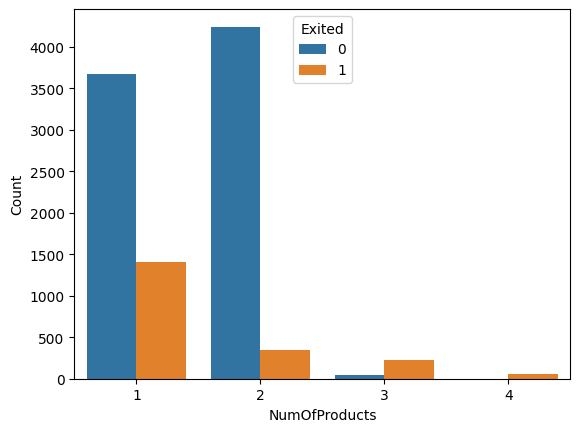

In [196]:
sns.barplot(data=df_pro, x='NumOfProducts', y='Count', hue='Exited')

## **Geography and Gender**

In [197]:
df_geo = df.groupby(by=['Geography', 'Exited', 'Gender']).agg('count')
df_geo = df_geo.rename(columns={'CreditScore':'Count'})
df_geo = df_geo[['Count']]
df_geo.reset_index(inplace=True, drop=False)
df_geo

,Geography,Exited,Gender,Count
0,France,0,Female,1801
1,France,0,Male,2403
2,France,1,Female,460
3,France,1,Male,350
4,Germany,0,Female,745
5,Germany,0,Male,950
6,Germany,1,Female,448
7,Germany,1,Male,366
8,Spain,0,Female,858
9,Spain,0,Male,1206


In [198]:
df_geo_ex = df_geo[df_geo['Exited']==1]

df_geo_ex['geo_gen'] = df_geo_ex['Geography'] + '-' + df_geo_ex['Gender']
df_geo_ex

<ipython-input-198-4f9ed654513f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_geo_ex['geo_gen'] = df_geo_ex['Geography'] + '-' + df_geo_ex['Gender']


,Geography,Exited,Gender,Count,geo_gen
2,France,1,Female,460,France-Female
3,France,1,Male,350,France-Male
6,Germany,1,Female,448,Germany-Female
7,Germany,1,Male,366,Germany-Male
10,Spain,1,Female,231,Spain-Female
11,Spain,1,Male,182,Spain-Male


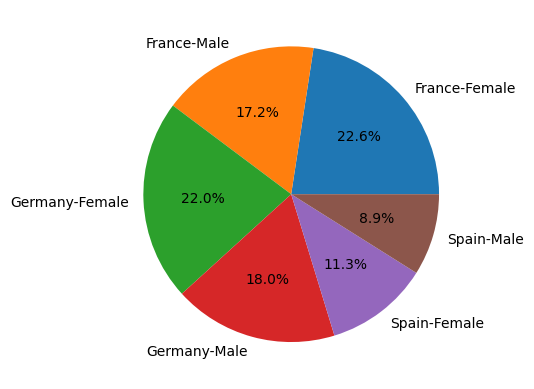

In [199]:
labels = df_geo_ex['geo_gen']

fig1, ax1 = plt.subplots()
ax1.pie(df_geo_ex['Count'], labels=labels, autopct='%1.1f%%')

plt.show()

- In general, among the churned customers, females have a higher proportion compared to males.
- Among the total churned customers, females in France and males in Germany have the highest proportions.

In [200]:
df_geo_inex = df_geo[df_geo['Exited']==0]

df_geo_inex['geo_gen'] = df_geo_inex['Geography'] + '-' + df_geo_inex['Gender']
df_geo_inex

<ipython-input-200-f92a4efb466a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_geo_inex['geo_gen'] = df_geo_inex['Geography'] + '-' + df_geo_inex['Gender']


,Geography,Exited,Gender,Count,geo_gen
0,France,0,Female,1801,France-Female
1,France,0,Male,2403,France-Male
4,Germany,0,Female,745,Germany-Female
5,Germany,0,Male,950,Germany-Male
8,Spain,0,Female,858,Spain-Female
9,Spain,0,Male,1206,Spain-Male


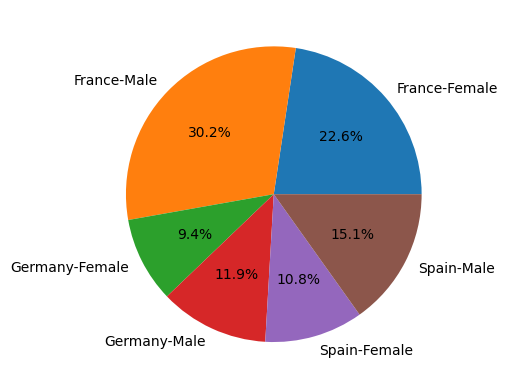

In [201]:
labels = df_geo_inex['geo_gen']

fig1, ax1 = plt.subplots()
ax1.pie(df_geo_inex['Count'], labels=labels, autopct='%1.1f%%')

plt.show()

- Among the non-churned customers, France has the highest proportion of males (because the female population in France in the data is higher than in the other two countries, and females also churn more).
- In Germany, despite a low number of surveyed individuals, the churn rate remains high, indicating a significant churn proportion.

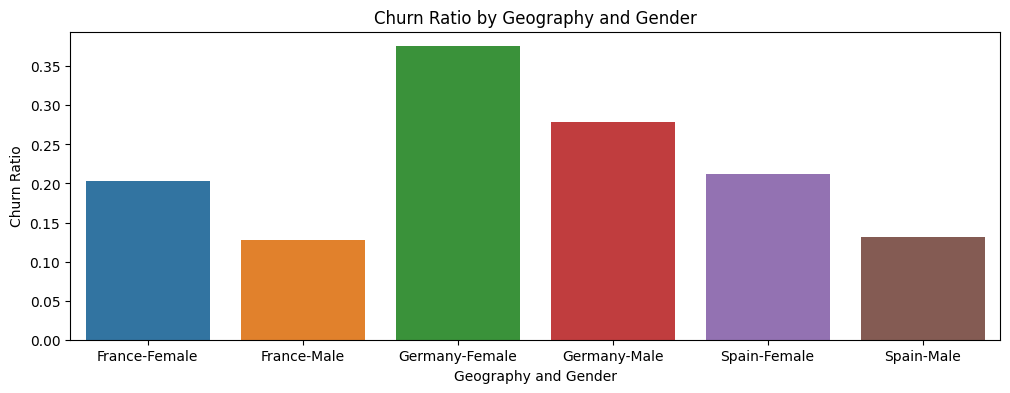

In [202]:
df_sum = pd.merge(df_geo_ex, df_geo_inex, how='outer', on=['geo_gen', 'Geography', 'Gender'], suffixes=('_ex', '_inex'))

# Calculate the churn ratio using the 'Count_ex' and 'Count_inex' columns
df_sum['ratio'] = df_sum['Count_ex'] / (df_sum['Count_ex'] + df_sum['Count_inex'])

# Display the DataFrame
df_sum

# create a bar plot of the churn ratios
fig, ax = plt.subplots(figsize=[12, 4])
sns.barplot(data=df_sum, x='geo_gen', y='ratio', ax=ax)
ax.set_title('Churn Ratio by Geography and Gender')
ax.set_xlabel('Geography and Gender')
ax.set_ylabel('Churn Ratio')
plt.show()

In [203]:
df_sum

,Geography,Exited_ex,Gender,Count_ex,geo_gen,Exited_inex,Count_inex,ratio
0,France,1,Female,460,France-Female,0,1801,0.203450
1,France,1,Male,350,France-Male,0,2403,0.127134
2,Germany,1,Female,448,Germany-Female,0,745,0.375524
3,Germany,1,Male,366,Germany-Male,0,950,0.278116
4,Spain,1,Female,231,Spain-Female,0,858,0.212121
5,Spain,1,Male,182,Spain-Male,0,1206,0.131124


- Male: Males in Germany have the highest churn rate among the male group.
- Female: In all three countries, females have a consistently high churn rate.

## **Tenure vs Gender**

In [204]:
df_ten_gen = df.groupby(by=['Tenure', 'Gender', 'Exited']).agg('count')
df_ten_gen.reset_index(inplace=True, drop=False)
df_ten_gen = df_ten_gen[['Tenure', 'Gender', 'Exited', 'CreditScore']]
df_ten_gen = df_ten_gen.rename(columns={'CreditScore':'Count'})
df_ten_gen.head(5)

,Tenure,Gender,Exited,Count
0,0,Female,0,149
1,0,Female,1,55
2,0,Male,0,169
3,0,Male,1,40
4,1,Female,0,348



Since females in all three countries have higher churn rates than males, the charts will have distinct shapes.

<Axes: xlabel='Tenure', ylabel='Count'>

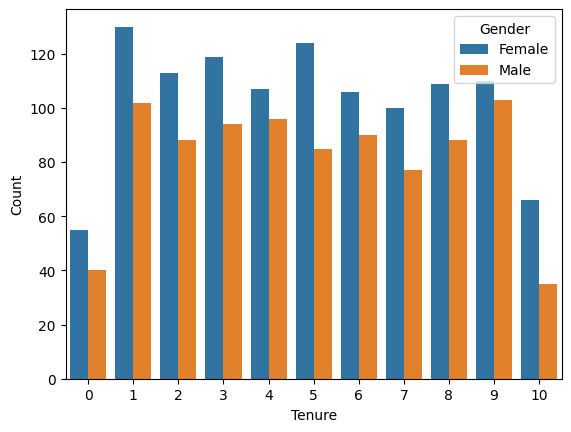

In [205]:
# Exited

sns.barplot(x=df_ten_gen[df_ten_gen['Exited']==1]['Tenure'], y=df_ten_gen['Count'], hue= df_ten_gen['Gender'])

<Axes: xlabel='Tenure', ylabel='Count'>

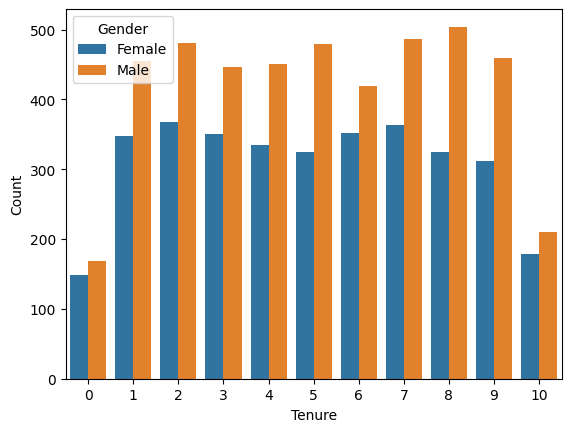

In [206]:
# Inexited
sns.barplot(x=df_ten_gen[df_ten_gen['Exited']==0]['Tenure'], y=df_ten_gen['Count'], hue= df_ten_gen['Gender'])

In [207]:
df_ten_gen_churn = df_ten_gen[df_ten_gen['Exited'] == 1]
df_ten_gen_not_churn = df_ten_gen[df_ten_gen['Exited'] == 0]

k = pd.merge(df_ten_gen_churn, df_ten_gen_not_churn, how='inner', on=['Tenure', 'Gender'],
              suffixes = ['_churn', '_not_churn'])
k['exit_ratio'] = k['Count_churn']/(k['Count_not_churn']+k['Count_churn'])
k

,Tenure,Gender,Exited_churn,Count_churn,Exited_not_churn,Count_not_churn,exit_ratio
0,0,Female,1,55,0,149,0.269608
1,0,Male,1,40,0,169,0.191388
2,1,Female,1,130,0,348,0.271967
3,1,Male,1,102,0,455,0.183124
4,2,Female,1,113,0,367,0.235417
5,2,Male,1,88,0,480,0.154930
6,3,Female,1,119,0,350,0.253731
7,3,Male,1,94,0,446,0.174074
8,4,Female,1,107,0,335,0.242081
9,4,Male,1,96,0,451,0.175503


The churn rate for female customers is higher than for male customers, consistently across all tenure periods.

<Axes: xlabel='Tenure', ylabel='exit_ratio'>

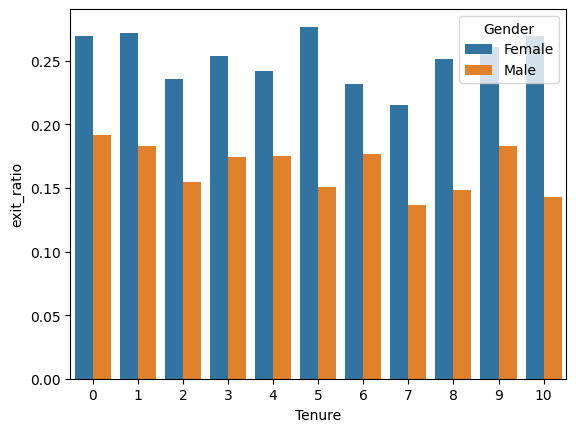

In [208]:
sns.barplot(data=k, x= 'Tenure', y='exit_ratio', hue='Gender')

Tenure = 7

In [209]:
len(df[(df['Geography']=='Germany')&(df['Tenure']==7)])/len(df[df['Tenure']==7])

0.2188715953307393

Tenure = 9

In [210]:
len(df[(df['Geography']=='Germany')&(df['Tenure']==9)])/len(df[df['Tenure']==9])

0.2733739837398374

- The churn rate for German customers (both male and female) at tenure = 7 is lower than the churn rate for German customers (both male and female) at tenure = 9 => this pulls the churn rate down at tenure = 7 as predicted initially.
- The number of users with 3 products and 4 products also has a higher churn rate compared to the number of users with 1 product and 2 products.

## **Number of products by gender and geography**

In [211]:
df_pro = df.groupby(by=['Exited', 'NumOfProducts', 'Geography']).agg('count')
df_pro.reset_index(drop=False, inplace=True)
df_pro = df_pro[['Exited', 'NumOfProducts', 'CreditScore', 'Geography']]
df_pro = df_pro.rename(columns={'CreditScore':'Count'})
df_pro

,Exited,NumOfProducts,Count,Geography
0,0,1,1950,France
1,0,1,771,Germany
2,0,1,954,Spain
3,0,2,2232,France
4,0,2,914,Germany
5,0,2,1096,Spain
6,0,3,22,France
7,0,3,10,Germany
8,0,3,14,Spain
9,1,1,564,France


<Axes: xlabel='NumOfProducts', ylabel='Count'>

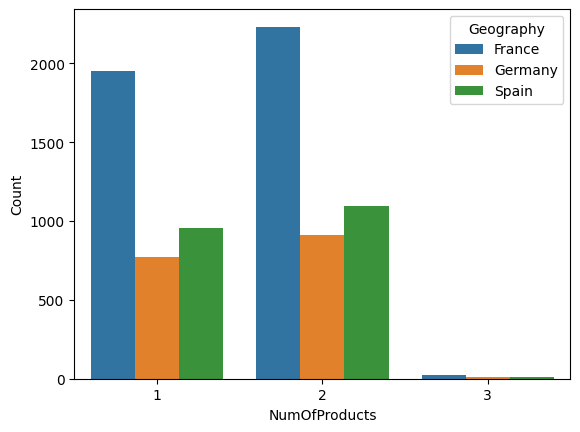

In [212]:
sns.barplot(data=df_pro.loc[df_pro['Exited'] == 0], x='NumOfProducts', y='Count', hue='Geography')


- All customers using 4 products from the bank churn.
- In all three countries, the majority of customers use 1 or 2 products.
- The number of customers using 1, 2, and 3 products in Germany and the Spain is approximately half of the number of customers with the same usage in France."

<Axes: xlabel='NumOfProducts', ylabel='Count'>

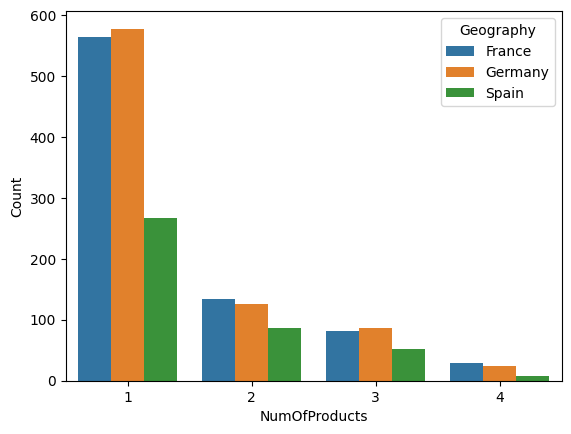

In [213]:
sns.barplot(data=df_pro.loc[df_pro['Exited'] == 1], x='NumOfProducts', y='Count', hue='Geography')

However, in this chart, the number of people churning in Germany is equivalent to the number of people churning in France, and even higher at the level of using 1 product and 3 products.
=> Germans still have a higher churn rate.

In [214]:
# Chart representing the churn rate based on the number of products used
df_product = df.groupby(by=['Exited', 'NumOfProducts']).agg('count')
df_product.reset_index(drop=False, inplace=True)
df_product = df_product[['Exited', 'NumOfProducts', 'Age']]
df_product = df_product.rename(columns={'Age':'count'})
df_product = pd.merge(df_product[df_product['Exited'] == 0], df_product[df_product['Exited'] == 1], on='NumOfProducts', how='outer', suffixes=('_inex', '_ex'))
df_product.fillna(inplace=True, value=0)
df_product['ratio'] = df_product['count_ex']/(df_product['count_inex']+df_product['count_ex'])
df_product['total_customer']=df_product['count_inex']+df_product['count_ex']
df_product

,Exited_inex,NumOfProducts,count_inex,Exited_ex,count_ex,ratio,total_customer
0,0.0,1,3675.0,1,1409,0.277144,5084.0
1,0.0,2,4242.0,1,348,0.075817,4590.0
2,0.0,3,46.0,1,220,0.827068,266.0
3,0.0,4,0.0,1,60,1.000000,60.0


<Axes: xlabel='NumOfProducts', ylabel='ratio'>

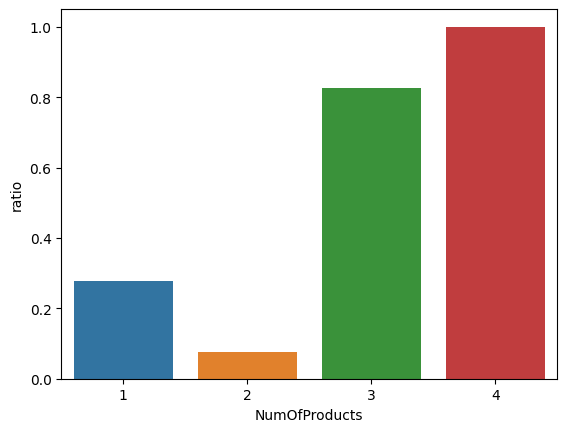

In [215]:
sns.barplot(data=df_product, x='NumOfProducts', y='ratio')

- The highest percentage of churn customers is in the group of customers using 4 products. However, only 1 customer recorded belongs to this group

- There are slightly lower customers in group 1 product (5082 people) than in group 2 (4590 people). The churn rate of the group using 1 product was 4 times higher than the group using 2 products

- Up to 82.7% of customers in the group using 3 products are churn

<Axes: xlabel='NumOfProducts', ylabel='count'>

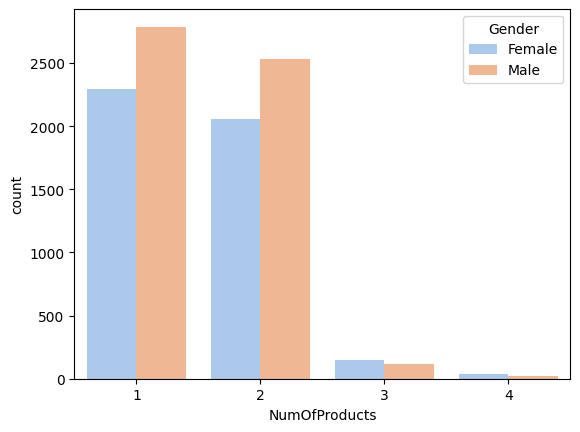

In [216]:
color_palette = 'pastel'
sns.countplot(data=df, x='NumOfProducts', hue='Gender', palette=color_palette)

- There are more women buying 1 or 2 products through banks than men, but this trend is the opposite in the number of products is 3 and 4.

# **3. Detecting and handling outliers**

## **Outlier**

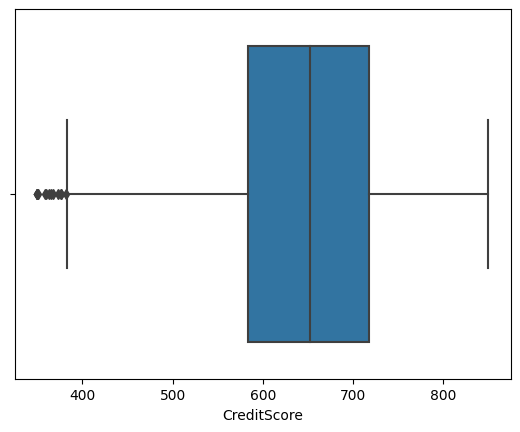

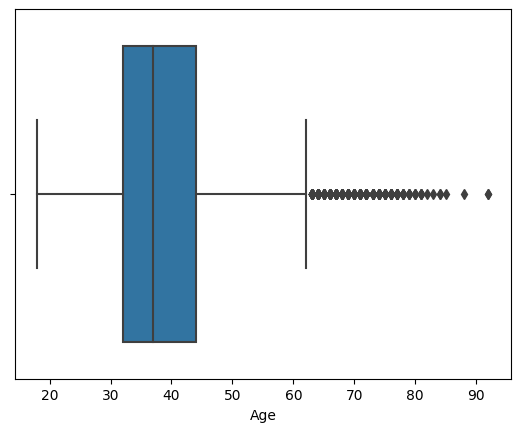

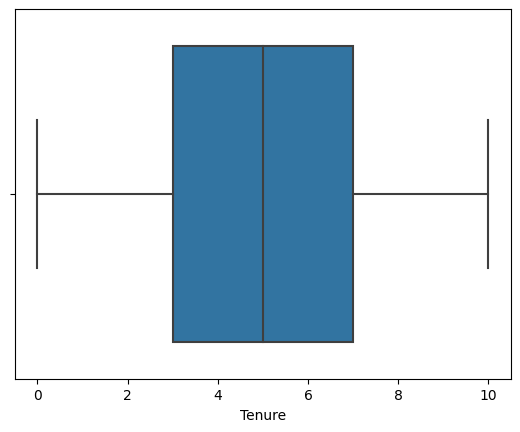

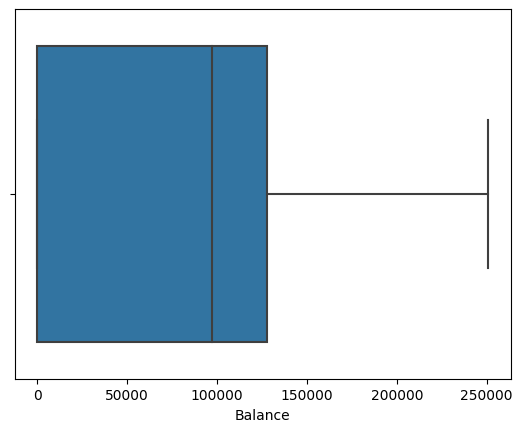

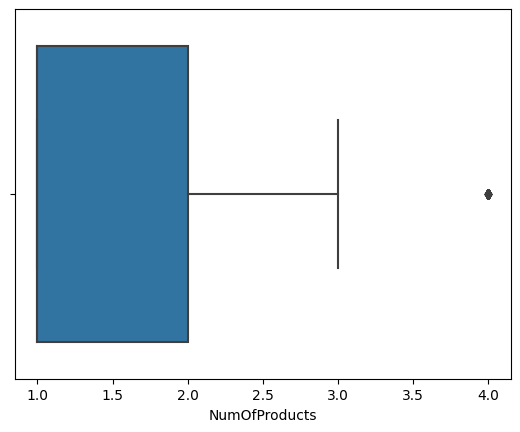

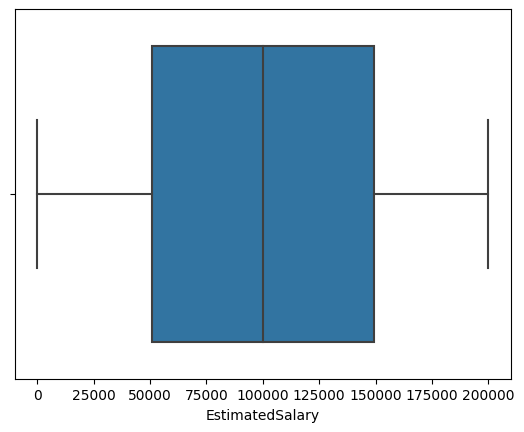

In [217]:
outlier_plot = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
for i in outlier_plot:
  sns.boxplot(x=df[i])
  plt.show()

## **Handling outlier**

In [218]:
df_copy = df.copy()

In [219]:
# Find outliers
def detect_outlier(col):

# first quantile/percentile
  first_qrt = np.quantile(df_copy[col], 0.25)
# third quantile/percentile
  third_qrt = np.quantile(df_copy[col], 0.75)

  lower_whisker = first_qrt - (third_qrt - first_qrt)*1.5
  print('lower_whisker:', lower_whisker)
  upper_whisker = third_qrt + (third_qrt - first_qrt) * 1.5
  print('upper_whisker:', upper_whisker)

  outlier = df_copy.loc[(df_copy[col]<lower_whisker) | (df_copy[col] > upper_whisker)]
  print('Numer of outliers:', len(outlier))
  print('% outliers: ', len(outlier)*100/len(df_copy), '%')
  # return outlier

In [220]:
# create a boxplot and then find the upper and lower bounds to prepare for outlier treatment using the scipy.stats module
def boxplot(col):
  plt.figure(figsize=(8, 5))
  sns.boxplot(y=col, data=df_copy)

In [221]:
# prepare for outlier treatment using the scipy.stats module
df_cleaned = df_copy.copy()
import scipy.stats
def new_df(col, lower_lim, upper_lim):
  df_cleaned[col] = scipy.stats.mstats.winsorize(df_cleaned[col], limits = [lower_lim, upper_lim])

## **Credit Score**

In [222]:
detect_outlier('CreditScore')

lower_whisker: 383.0
upper_whisker: 919.0
Numer of outliers: 15
% outliers:  0.15 %


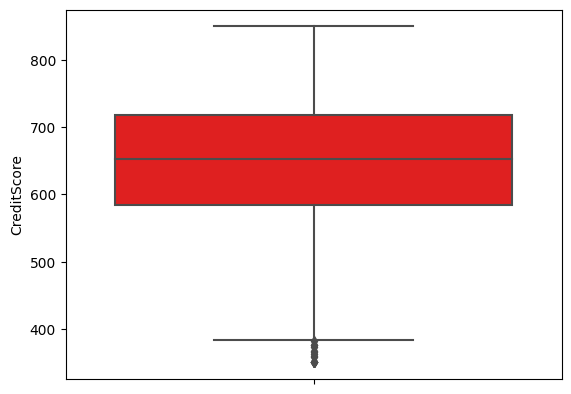

In [223]:
sns.boxplot(y='CreditScore', data=df, color='Red')
plt.show()

In [224]:
new_df('CreditScore', 0.0015, 0)

<Axes: ylabel='CreditScore'>

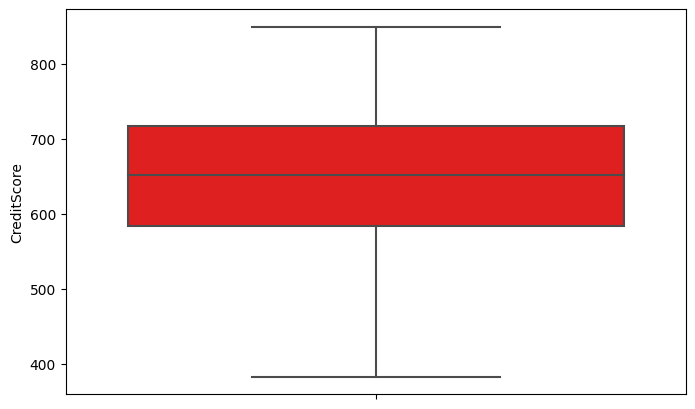

In [225]:
plt.figure(figsize=(8, 5))
sns.boxplot(y='CreditScore', data=df_cleaned, color='Red')

## **Age**

In [226]:
detect_outlier('Age')

lower_whisker: 14.0
upper_whisker: 62.0
Numer of outliers: 359
% outliers:  3.59 %


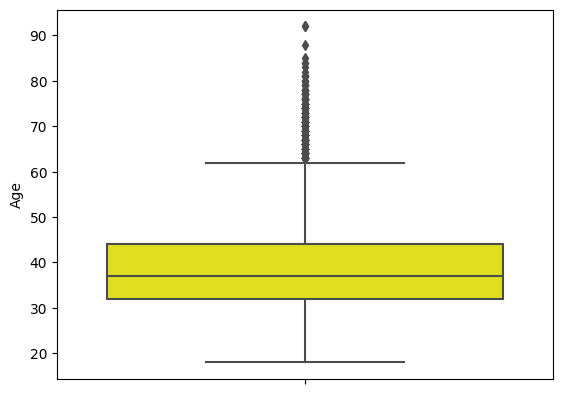

In [227]:
sns.boxplot(y='Age', data=df, color='Yellow')
plt.show()

In [228]:
new_df('Age', 0, 0.64)

<Axes: ylabel='Age'>

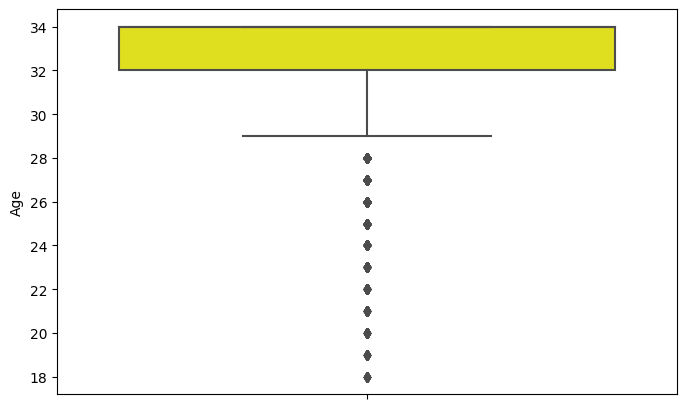

In [229]:
plt.figure(figsize=(8, 5))
sns.boxplot(y='Age', data=df_cleaned, color='Yellow')

## **Number Of Products**

In [230]:
detect_outlier('NumOfProducts')

lower_whisker: -0.5
upper_whisker: 3.5
Numer of outliers: 60
% outliers:  0.6 %


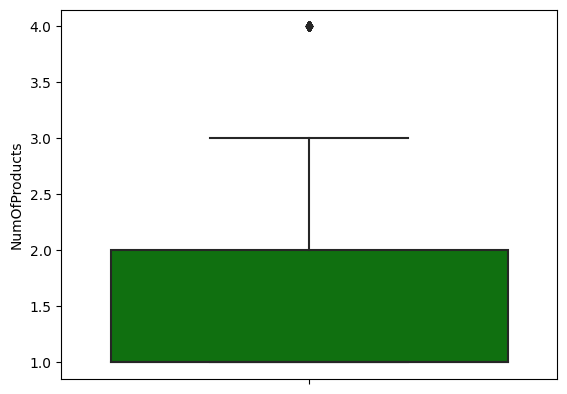

In [231]:
sns.boxplot(y='NumOfProducts', data=df, color='Green')
plt.show()

In [232]:
new_df('NumOfProducts',0,0.007)

<Axes: ylabel='NumOfProducts'>

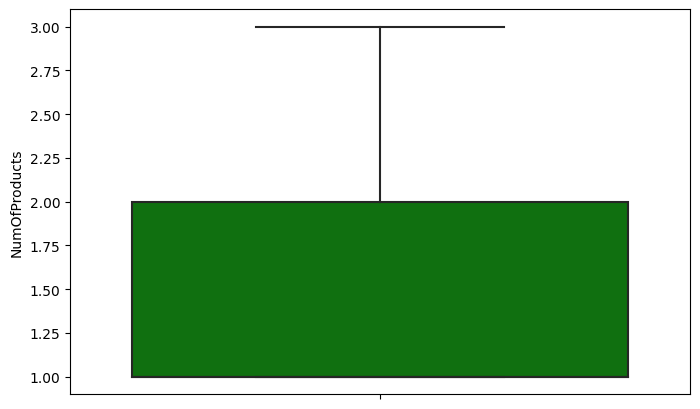

In [233]:
plt.figure(figsize=(8, 5))
sns.boxplot(y='NumOfProducts', data=df_cleaned, color='Green')

In [234]:
df_cleaned

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,group_bal
0,619,France,Female,34,2,0.00,1,1,1,101348.88,1,0
1,608,Spain,Female,34,1,83807.86,1,0,1,112542.58,0,50
2,502,France,Female,34,8,159660.80,3,1,0,113931.57,1,150
3,699,France,Female,34,1,0.00,2,0,0,93826.63,0,0
4,850,Spain,Female,34,2,125510.82,1,1,1,79084.10,0,100
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,34,5,0.00,2,1,0,96270.64,0,0
9996,516,France,Male,34,10,57369.61,1,1,1,101699.77,0,50
9997,709,France,Female,34,7,0.00,1,0,1,42085.58,1,0
9998,772,Germany,Male,34,3,75075.31,2,1,0,92888.52,1,50


# **4.Model**

## **Correlation**

In [235]:
corr = df_cleaned.corr()
corr

<ipython-input-235-ece0170d7d89>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_cleaned.corr()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,group_bal
CreditScore,1.000000,-0.006238,0.000721,0.006389,0.012302,-0.005396,0.025537,-0.001150,-0.026455,0.005992
Age,-0.006238,1.000000,-0.011749,0.019771,-0.022382,-0.004102,-0.001855,-0.006999,0.168972,0.017813
Tenure,0.000721,-0.011749,1.000000,-0.012254,0.012878,0.022583,-0.028362,0.007784,-0.014001,-0.010270
Balance,0.006389,0.019771,-0.012254,1.000000,-0.318373,-0.014858,-0.010084,0.012797,0.118533,0.972251
NumOfProducts,0.012302,-0.022382,0.012878,-0.318373,1.000000,0.003821,0.010647,0.013860,-0.070736,-0.297266
HasCrCard,-0.005396,-0.004102,0.022583,-0.014858,0.003821,1.000000,-0.011866,-0.009933,-0.007138,-0.014807
IsActiveMember,0.025537,-0.001855,-0.028362,-0.010084,0.010647,-0.011866,1.000000,-0.011421,-0.156128,-0.010689
EstimatedSalary,-0.001150,-0.006999,0.007784,0.012797,0.013860,-0.009933,-0.011421,1.000000,0.012097,0.011560
Exited,-0.026455,0.168972,-0.014001,0.118533,-0.070736,-0.007138,-0.156128,0.012097,1.000000,0.117511
group_bal,0.005992,0.017813,-0.010270,0.972251,-0.297266,-0.014807,-0.010689,0.011560,0.117511,1.000000


<Axes: >

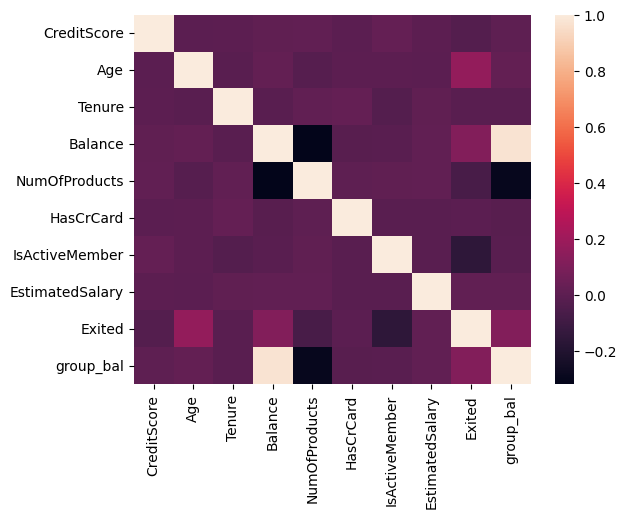

In [236]:
sns.heatmap(corr)

## **Logistic Regression**

In [237]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, metrics
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler

In [238]:
sc = StandardScaler()
for i in ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']:
  df_cleaned[i] = sc.fit_transform(df_cleaned[i].values.reshape(-1, 1))

In [239]:
df_cleaned

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,group_bal
0,-0.326878,France,Female,0.534474,2,-1.225848,1,1,1,0.021886,1,0
1,-0.440804,Spain,Female,0.534474,1,0.117350,1,0,1,0.216534,0,50
2,-1.538636,France,Female,0.534474,8,1.333053,3,1,0,0.240687,1,150
3,0.501675,France,Female,0.534474,1,-1.225848,2,0,0,-0.108918,0,0
4,2.065569,Spain,Female,0.534474,2,0.785728,1,1,1,-0.365276,0,100
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.247373,France,Male,0.534474,5,-1.225848,2,1,0,-0.066419,0,0
9996,-1.393640,France,Male,0.534474,10,-0.306379,1,1,1,0.027988,0,50
9997,0.605244,France,Female,0.534474,7,-1.225848,1,0,1,-1.008643,1,0
9998,1.257730,Germany,Male,0.534474,3,-0.022608,2,1,0,-0.125231,1,50


In [240]:
df_cleaned = df_cleaned.drop(columns=['group_bal'])
df_cleaned

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326878,France,Female,0.534474,2,-1.225848,1,1,1,0.021886,1
1,-0.440804,Spain,Female,0.534474,1,0.117350,1,0,1,0.216534,0
2,-1.538636,France,Female,0.534474,8,1.333053,3,1,0,0.240687,1
3,0.501675,France,Female,0.534474,1,-1.225848,2,0,0,-0.108918,0
4,2.065569,Spain,Female,0.534474,2,0.785728,1,1,1,-0.365276,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,1.247373,France,Male,0.534474,5,-1.225848,2,1,0,-0.066419,0
9996,-1.393640,France,Male,0.534474,10,-0.306379,1,1,1,0.027988,0
9997,0.605244,France,Female,0.534474,7,-1.225848,1,0,1,-1.008643,1
9998,1.257730,Germany,Male,0.534474,3,-0.022608,2,1,0,-0.125231,1


In [241]:
df_cleaned_dum = pd.get_dummies(df_cleaned)

In [242]:
X = df_cleaned_dum.drop(columns=['Exited', 'HasCrCard', 'Balance'], axis=-1)
y = df_cleaned_dum['Exited']
X = X.values
y = y.values

In [243]:
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X, y, test_size = 0.3, random_state = 0)
model = LogisticRegression()
model.fit(X_train_cleaned, y_train_cleaned)

LogisticRegression()

In [244]:
accuracy_score(y_test_cleaned, model.predict(X_test_cleaned))

0.798

              precision    recall  f1-score   support

           0       0.81      0.98      0.88      2379
           1       0.56      0.11      0.18       621

    accuracy                           0.80      3000
   macro avg       0.68      0.54      0.53      3000
weighted avg       0.76      0.80      0.74      3000



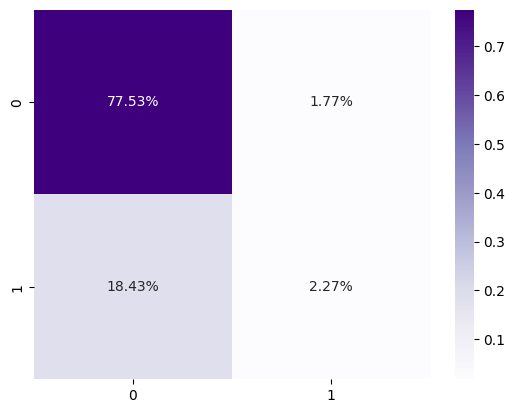

In [256]:
cf_matrix = confusion_matrix(y_test_cleaned, model.predict(X_test_cleaned))

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Purples')
print(classification_report(y_test_cleaned, model.predict(X_test_cleaned)))

## **Decision Tree**

In [246]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=1)
clf.fit(X_train_cleaned, y_train_cleaned)

accuracy_score(y_test_cleaned, clf.predict(X_test_cleaned))

0.8193333333333334

              precision    recall  f1-score   support

           0       0.82      0.99      0.90      2379
           1       0.87      0.15      0.26       621

    accuracy                           0.82      3000
   macro avg       0.84      0.57      0.58      3000
weighted avg       0.83      0.82      0.76      3000



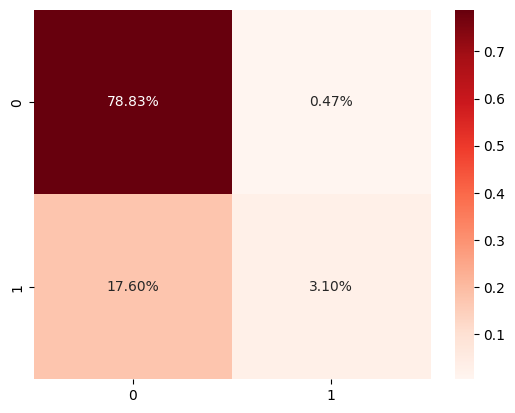

In [247]:
cf_matrix_dt = confusion_matrix(y_test_cleaned, clf.predict(X_test_cleaned))

sns.heatmap(cf_matrix_dt/np.sum(cf_matrix_dt), annot=True, fmt='.2%', cmap='Reds')
print(classification_report(y_test_cleaned, clf.predict(X_test_cleaned)))

## **SVC**

In [248]:
svm = SVC()
svm.fit(X_train_cleaned, y_train_cleaned)

accuracy_score(y_test_cleaned, svm.predict(X_test_cleaned))

0.793

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      2379
           1       0.00      0.00      0.00       621

    accuracy                           0.79      3000
   macro avg       0.40      0.50      0.44      3000
weighted avg       0.63      0.79      0.70      3000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


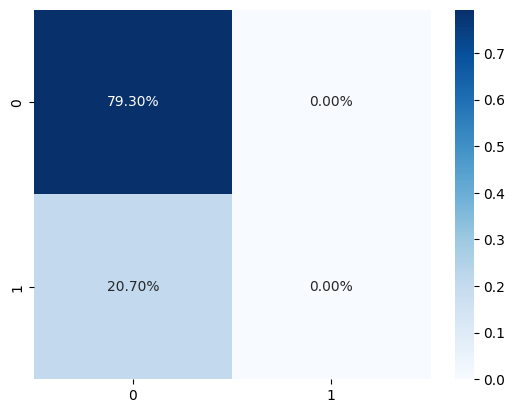

In [249]:
cf_matrix_svm = confusion_matrix(y_test_cleaned, svm.predict(X_test_cleaned))

sns.heatmap(cf_matrix_svm/np.sum(cf_matrix_svm), annot=True, fmt='.2%', cmap='Blues')
print(classification_report(y_test_cleaned, svm.predict(X_test_cleaned)))

## **Random Forest**

In [250]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, classification_report, classification_report

In [251]:
rd_fr = RandomForestClassifier()
rd_fr.fit(X_train_cleaned, y_train_cleaned)
accuracy_score(y_test_cleaned, rd_fr.predict(X_test_cleaned))

0.815

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      2379
           1       0.59      0.37      0.45       621

    accuracy                           0.81      3000
   macro avg       0.72      0.65      0.67      3000
weighted avg       0.79      0.81      0.80      3000



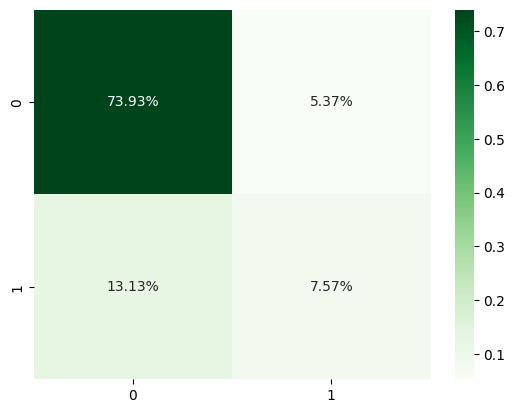

In [252]:
cf_matrix_rdfr = confusion_matrix(y_test_cleaned, rd_fr.predict(X_test_cleaned))

sns.heatmap(cf_matrix_rdfr/np.sum(cf_matrix_rdfr), annot=True, fmt='.2%', cmap='Greens')
print(classification_report(y_test_cleaned, rd_fr.predict(X_test_cleaned)))

In [253]:
cf_matrix_rdfr

array([[2218,  161],
       [ 394,  227]])